In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.io
import os
import sys
import glob
import pandas as pd
from scipy import signal
# サンプリング周波数は300Hz

In [2]:
os.listdir('./physionet.org/files/challenge-2017/1.0.0/training/')

['SHA1SUMS',
 'REFERENCE-v1.csv',
 'MD5SUMS',
 'A03',
 'RECORDS-noisy',
 'SHA256SUMS',
 'RECORDS',
 'A07',
 'REFERENCE.csv',
 'REFERENCE-v3.csv',
 'A04',
 'RECORDS-other',
 'A08',
 'A05',
 'RECORDS-af',
 'A00',
 'RECORDS-normal',
 'REFERENCE-v0.csv',
 'A02',
 'A06',
 'index.html',
 'REFERENCE-v2.csv',
 'A01']

In [3]:
data_path_head = ('./physionet.org/files/challenge-2017/1.0.0/training/')
data_path_a00 = glob.glob(data_path_head + '/A00')
data_path_a00_str = ''.join(data_path_a00)
print(data_path_a00_str)

./physionet.org/files/challenge-2017/1.0.0/training//A00


In [4]:
data_path_a00_001 = glob.glob(data_path_a00_str + '/*004.mat')
data_path_a00_001_str = ''.join(data_path_a00_001)
print(data_path_a00_001_str)

./physionet.org/files/challenge-2017/1.0.0/training//A00/A00004.mat


In [5]:
# MATLABファイルの読み込み
data_a00_001 = scipy.io.loadmat(data_path_a00_001_str)
print(type(data_a00_001))
display(data_a00_001)

<class 'dict'>


{'val': array([[519, 619, 723, ..., 116,  17,  18]], dtype=int16)}

In [6]:
display(data_a00_001.keys())
print('=============')
display(data_a00_001.values())

dict_keys(['val'])

dict_values([array([[519, 619, 723, ..., 116,  17,  18]], dtype=int16)])

In [7]:
print(data_path_a00_001_str[-15:])

/A00/A00004.mat


In [8]:
data_a00_001_list = list(data_a00_001.values())
display(data_a00_001_list)
print(type(data_a00_001_list))

[array([[519, 619, 723, ..., 116,  17,  18]], dtype=int16)]

<class 'list'>


In [9]:
for index, value in enumerate(np.ravel(data_a00_001_list)):
    print(index)
    print(value)
    if index ==6:
        break
     

0
519
1
619
2
723
3
827
4
914
5
956
6
955


In [10]:
df_a00_001 = pd.DataFrame(np.ravel(data_a00_001_list))
display(df_a00_001)

,0
0,519
1,619
2,723
3,827
4,914
...,...
8995,403
8996,224
8997,116
8998,17


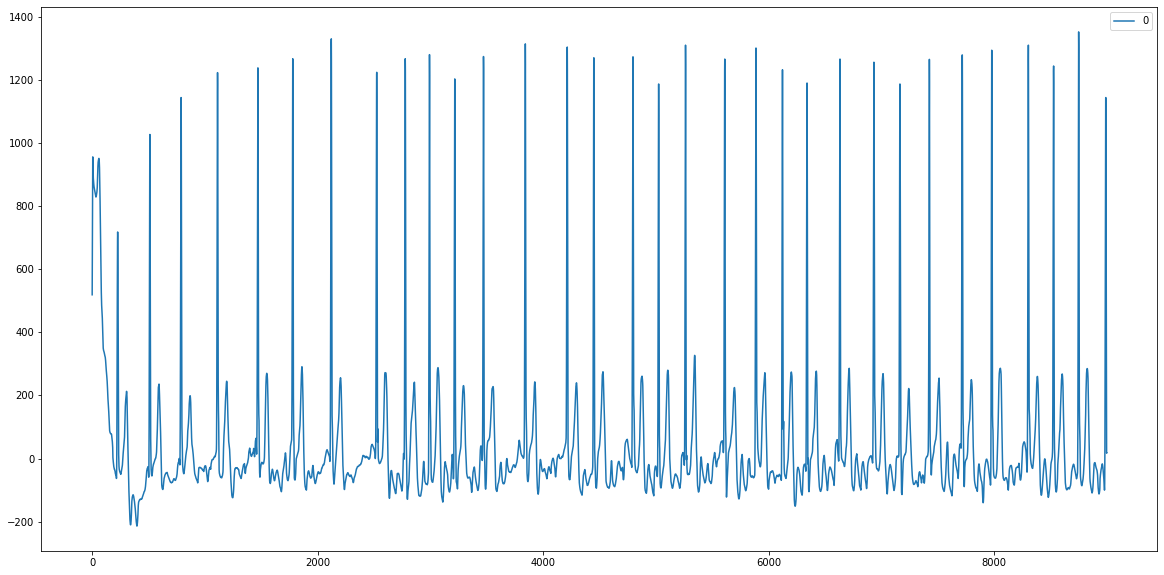

In [11]:
df_a00_001.plot(figsize=(20,10))

In [12]:
df_a00_001.columns = ['a00_001']
df_a00_001['detrend'] = signal.detrend(df_a00_001)

In [13]:
display(df_a00_001)

,a00_001,detrend
0,519,2.273737e-13
1,619,2.273737e-13
2,723,2.273737e-13
3,827,2.273737e-13
4,914,2.273737e-13
...,...,...
8995,403,1.136868e-13
8996,224,8.526513e-14
8997,116,1.421085e-14
8998,17,7.105427e-15


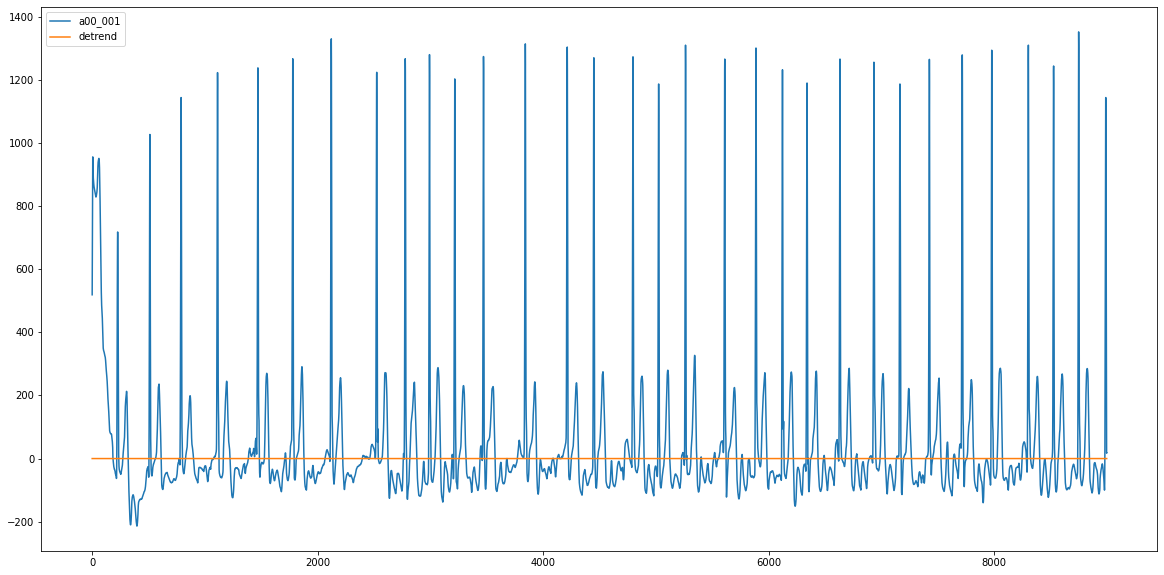

In [14]:
df_a00_001.plot(figsize=(20,10))
plt.legend(loc='best')

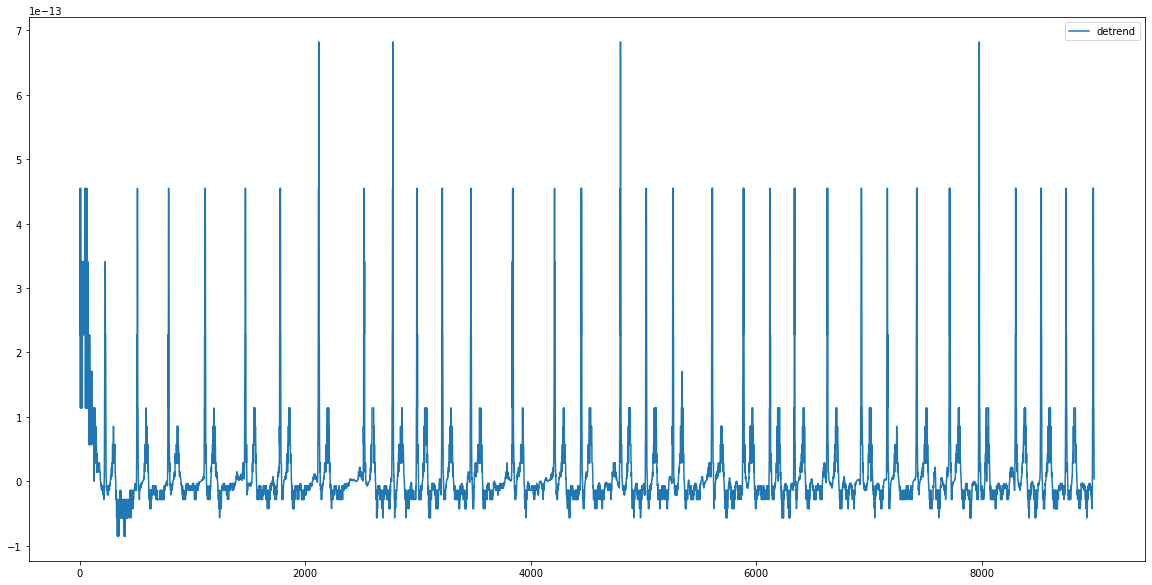

In [15]:
df_a00_001['detrend'].plot(figsize=(20,10))
plt.legend(loc='best')

In [16]:
display(df_a00_001.index)

RangeIndex(start=0, stop=9000, step=1)

In [17]:
df_a00_001_reset_index = df_a00_001.reset_index()
df_a00_001_reset_index = df_a00_001_reset_index.rename(columns={'index': 'time'})
display(df_a00_001_reset_index)

,time,a00_001,detrend
0,0,519,2.273737e-13
1,1,619,2.273737e-13
2,2,723,2.273737e-13
3,3,827,2.273737e-13
4,4,914,2.273737e-13
...,...,...,...
8995,8995,403,1.136868e-13
8996,8996,224,8.526513e-14
8997,8997,116,1.421085e-14
8998,8998,17,7.105427e-15


In [18]:
numtaps = 51 #FIRフイルターの長さ
cutoff = [0.05, 100]
N = len(df_a00_001_reset_index['detrend'])
fs = 300

filter_bandpass = signal.firwin(numtaps=numtaps, cutoff=cutoff,
                                fs=fs, pass_zero=False)
df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
                                                            1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
display(df_a00_001_reset_index)

,time,a00_001,detrend,bandpass_005_100
0,0,519,2.273737e-13,1.945203e-16
1,1,619,2.273737e-13,1.881824e-16
2,2,723,2.273737e-13,-7.638671e-17
3,3,827,2.273737e-13,2.350744e-16
4,4,914,2.273737e-13,2.246990e-16
...,...,...,...,...
8995,8995,403,1.136868e-13,-2.037942e-14
8996,8996,224,8.526513e-14,-1.512216e-14
8997,8997,116,1.421085e-14,-1.252391e-14
8998,8998,17,7.105427e-15,-2.383508e-14


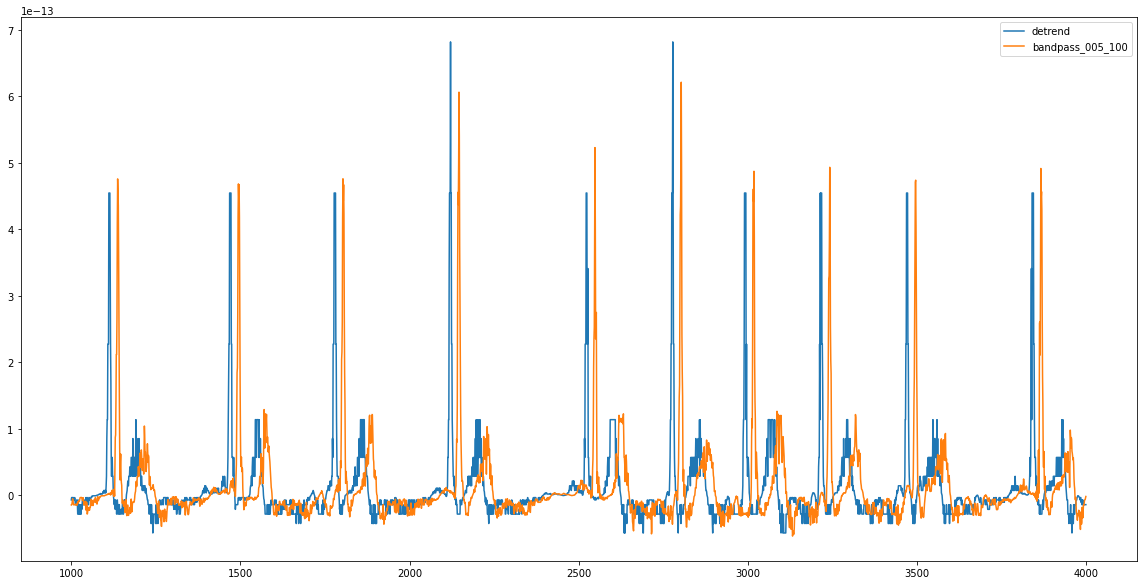

In [19]:

df_a00_001_reset_index.iloc[1000:4000, [2,3]].plot(figsize=(20,10))
plt.legend(loc='best')
plt.xlim=(0,1000)

In [20]:
border_0 = np.full(len(df_a00_001_reset_index['bandpass_005_100']), 0)
display(border_0)
border_6 = np.full(len(df_a00_001_reset_index['bandpass_005_100']), 6e-13)
display(border_6)
border_05 = np.full(len(df_a00_001_reset_index['bandpass_005_100']), 0.5e-13)
border_1 = np.full(len(df_a00_001_reset_index['bandpass_005_100']), 1e-13)
border_055 = np.full(len(df_a00_001_reset_index['bandpass_005_100']), 0.55e-13)
border_06 = np.full(len(df_a00_001_reset_index['bandpass_005_100']), 0.6e-13)

array([0, 0, 0, ..., 0, 0, 0])

array([6.e-13, 6.e-13, 6.e-13, ..., 6.e-13, 6.e-13, 6.e-13])

In [21]:
#peaks, properties = signal.find_peaks(df_a00_001_reset_index['bandpass_005_100'], distance=150, height=(0, 6))
# peaks, properties = signal.find_peaks(df_a00_001_reset_index['bandpass_005_100'], distance=120, height=(border_05,border_6),
#                                      threshold=(border_05, border_6))
peaks, properties = signal.find_peaks(df_a00_001_reset_index['bandpass_005_100'], distance=120, height=(border_05,border_6))
display(peaks)

array([  33,  252,  537,  814, 1137, 1494, 1803, 2143, 2548, 2878, 3018,
       3242, 3496, 3866, 4237, 4473, 4822, 5051, 5287, 5634, 5912, 6147,
       6368, 6656, 6957, 7189, 7450, 7743, 8008, 8330, 8554, 8773])

In [22]:
display(np.diff(peaks))
peaks_diff = np.diff(peaks)

array([219, 285, 277, 323, 357, 309, 340, 405, 330, 140, 224, 254, 370,
       371, 236, 349, 229, 236, 347, 278, 235, 221, 288, 301, 232, 261,
       293, 265, 322, 224, 219])

In [23]:
x_peaks = np.linspace(0, len(peaks), len(peaks))
display(x_peaks)

array([ 0.        ,  1.03225806,  2.06451613,  3.09677419,  4.12903226,
        5.16129032,  6.19354839,  7.22580645,  8.25806452,  9.29032258,
       10.32258065, 11.35483871, 12.38709677, 13.41935484, 14.4516129 ,
       15.48387097, 16.51612903, 17.5483871 , 18.58064516, 19.61290323,
       20.64516129, 21.67741935, 22.70967742, 23.74193548, 24.77419355,
       25.80645161, 26.83870968, 27.87096774, 28.90322581, 29.93548387,
       30.96774194, 32.        ])

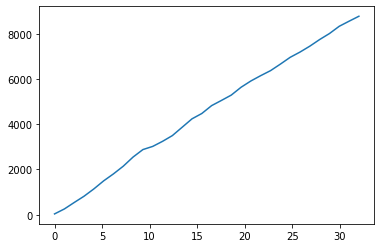

In [24]:
plt.plot(x_peaks, peaks)

In [25]:
x_peaks_diff = np.linspace(0, len(peaks_diff), len(peaks_diff))
display(x_peaks_diff)

array([ 0.        ,  1.03333333,  2.06666667,  3.1       ,  4.13333333,
        5.16666667,  6.2       ,  7.23333333,  8.26666667,  9.3       ,
       10.33333333, 11.36666667, 12.4       , 13.43333333, 14.46666667,
       15.5       , 16.53333333, 17.56666667, 18.6       , 19.63333333,
       20.66666667, 21.7       , 22.73333333, 23.76666667, 24.8       ,
       25.83333333, 26.86666667, 27.9       , 28.93333333, 29.96666667,
       31.        ])

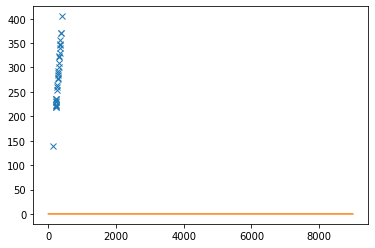

In [26]:
plt.plot(peaks_diff, df_a00_001_reset_index.index[peaks_diff], "x");
plt.plot(df_a00_001_reset_index['bandpass_005_100'])

In [27]:
print(np.ndim(df_a00_001_reset_index['bandpass_005_100']))

1


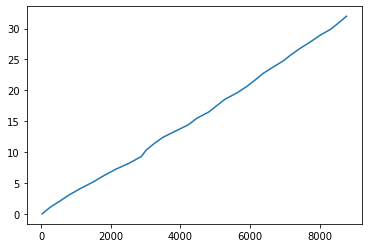

In [28]:
plt.plot(peaks, x_peaks)

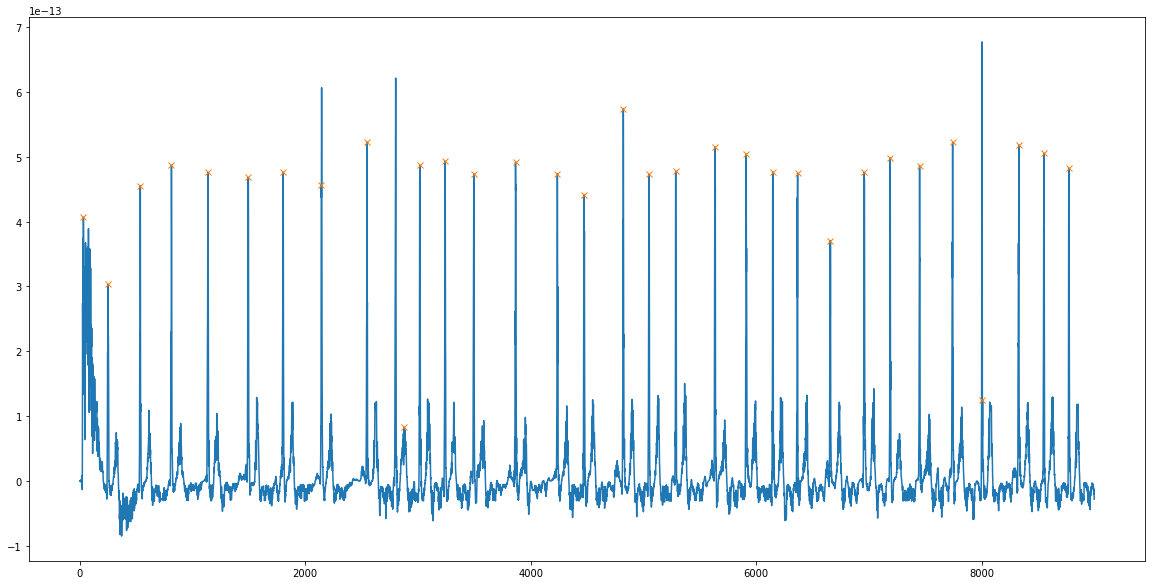

In [29]:
plt.figure(figsize=(20, 10))

plt.plot(df_a00_001_reset_index['bandpass_005_100'])
plt.plot(peaks, df_a00_001_reset_index['bandpass_005_100'][peaks], "x")